# Evaluation of Local Learning
This notebook is used to evaluate the different simulation results that are saved in various dataframes

In [14]:
import pandas as pd
import numpy as np

# Select clustered users
For our final results clusters_KMeans4_dtw was used

In [51]:
y = np.loadtxt('evaluations/federated_learning/clusters_KMeans4_dtw.csv', delimiter=',').astype(int)
num_clusters = 4
cluster_users = {i: [] for i in range(num_clusters)}

# Iterate through each cluster
for cluster_number in range(num_clusters):
    users_in_cluster = np.where(y == cluster_number)[0] +1
    cluster_users[cluster_number] = users_in_cluster
    
cluster_users

{0: array([ 1,  2,  4,  5,  7, 10, 11, 12, 15, 16, 17, 21, 22, 23, 24, 25, 28,
        30], dtype=int64),
 1: array([29], dtype=int64),
 2: array([ 6, 13, 18, 20, 26], dtype=int64),
 3: array([ 3,  8,  9, 14, 19, 27], dtype=int64)}

# Load results
Here the different evaluation df can be loaded. Each df contains the results for the 30 users and 3 training rounds. The idea is to show the mean vaolue for each cluster to make it comparable to federated learning

In [62]:
dense_results = pd.read_csv('evaluations/local_learning/LSTM_benchmark.csv')
dense_results.drop(columns=["Unnamed: 0"], inplace=True)
dense_results

,architecture,train_time,avg_time_epoch,mse,mse_std,rmse,rmse_std,mape,mape_std,mae,mae_std
0,L3_U16,9.349461,0.377300,0.034101,0.001172,0.184646,0.003174,7.684803e+04,76368.551047,0.128049,0.003624
1,L3_U16,6.901573,0.381778,0.017999,0.000795,0.134140,0.002948,1.563642e+05,19373.125474,0.078911,0.003110
2,L3_U16,9.861912,0.370500,0.021385,0.000986,0.146210,0.003351,5.275009e+04,27010.966959,0.083458,0.003016
3,L3_U16,12.407765,0.375891,0.022548,0.000398,0.150155,0.001323,1.323894e+05,10105.458214,0.065013,0.000794
4,L3_U16,8.969604,0.378942,0.014485,0.000220,0.120351,0.000911,1.006256e+05,8686.180798,0.077778,0.003253
...,...,...,...,...,...,...,...,...,...,...,...
175,L2_U20,53.499830,2.639695,0.030621,0.003712,0.174779,0.010494,1.177978e+05,38501.550518,0.110774,0.009411
176,L2_U20,109.373161,2.498577,0.020880,0.000204,0.144498,0.000706,1.224330e+05,5239.017740,0.103547,0.000877
177,L2_U20,68.815570,2.540393,0.010702,0.000358,0.103442,0.001724,5.429569e+04,13804.586163,0.046831,0.004418
178,L2_U20,56.531725,2.599237,0.020039,0.002462,0.141384,0.008588,5.313414e+05,78721.016695,0.100944,0.003674


In [64]:
df_evaluation = dense_results[150:180]
df_evaluation.reset_index(inplace=True)
df_results = pd.DataFrame(columns=["cluster", "architecture", "total_time","total_time_std", "time_epoch", "time_epoch_std",  "mse", "mse_std", "rmse",  "rmse_std", "mape",  "mape_std","mae", "mae_std",])

for cluster_number, users_in_cluster in cluster_users.items():
    #print(f"Cluster {cluster_number}:")
    
    cluster = f"cluster_{cluster_number}"
    architecture = "BiLSTM" #df_evaluation["architecture"][0]
    total_time = 0
    total_time_std = 0
    time_epoch = 0
    time_epoch_std = 0
    mse = 0
    mse_std = 0
    rmse = 0
    rmse_std = 0
    mape = 0
    mape_std = 0
    mae = 0
    mae_std = 0
    
    training_times = []
    training_times_epoch = []
    # Filter and print the users in the current cluster
    for user_index in users_in_cluster:
        total_time += df_evaluation["train_time"][user_index-1]
        training_times.append(df_evaluation["train_time"][user_index-1])
        time_epoch += df_evaluation["avg_time_epoch"][user_index-1]
        training_times_epoch.append(df_evaluation["avg_time_epoch"][user_index-1])
        mse += df_evaluation["mse"][user_index-1]
        mse_std += df_evaluation["mse_std"][user_index-1]
        mae += df_evaluation["mae"][user_index-1]
        mae_std += df_evaluation["mae_std"][user_index-1]
        rmse += df_evaluation["rmse"][user_index-1]
        rmse_std += df_evaluation["rmse_std"][user_index-1]
        mape += df_evaluation["mape"][user_index-1]
        mape_std += df_evaluation["mape_std"][user_index-1]
        
    num_users_in_cluster = len(users_in_cluster)
    new_row = {
        'cluster': cluster,
        'architecture': architecture, 
        'total_time' : total_time / num_users_in_cluster,
        "total_time_std" : np.std(training_times),
        'time_epoch' : time_epoch / num_users_in_cluster, 
        'time_epoch_std': np.std(training_times_epoch),
        'mse': mse / num_users_in_cluster,
        'mse_std' : mse_std/num_users_in_cluster,
        "rmse" : rmse / num_users_in_cluster,
        'rmse_std' : rmse_std / num_users_in_cluster, 
        "mape": mape / num_users_in_cluster,
        'mape_std' : mape_std / num_users_in_cluster,
        'mae':  mae / num_users_in_cluster,
        'mae_std' : mae_std / num_users_in_cluster
    }
    df_results.loc[len(df_results)] = new_row

num_users_in_cluster = len(users_in_cluster)
new_row = {
    'cluster': "Mean",
    'architecture': architecture, 
    'total_time' : df_results['total_time'].mean(),
    'total_time_std' : df_results['total_time_std'].mean(),
    'time_epoch' : df_results['time_epoch'].mean(),
    'time_epoch_std' : df_results['time_epoch_std'].mean(),
    'mse': df_results['mse'].mean(),
    'mse_std' : df_results['mse_std'].mean(),
    "rmse" : df_results['rmse'].mean(),
    'rmse_std' : df_results['rmse_std'].mean(),
    "mape": df_results['mape'].mean(),
    'mape_std' : df_results['mape_std'].mean(),
    'mae':  df_results['mae'].mean(),
    'mae_std' : df_results['mae_std'].mean(),
}
df_results.loc[len(df_results)] = new_row


    
model_1 = df_results
print("Mean: ", model_1["mse"].mean())
df_results

Mean:  0.021190742375242853


,cluster,architecture,total_time,total_time_std,time_epoch,time_epoch_std,mse,mse_std,rmse,rmse_std,mape,mape_std,mae,mae_std
0,cluster_0,BiLSTM,74.338533,18.127328,2.553019,0.039323,0.017413,0.000773,0.129817,0.002825,315244.673539,38645.296340,0.079878,0.003901
1,cluster_1,BiLSTM,56.531725,0.000000,2.599237,0.000000,0.020039,0.002462,0.141384,0.008588,531341.375000,78721.016695,0.100944,0.003674
2,cluster_2,BiLSTM,72.523720,12.089526,2.579315,0.044762,0.024477,0.003696,0.154268,0.010924,118564.807031,43998.699134,0.105067,0.008886
3,cluster_3,BiLSTM,82.197943,26.638802,2.554763,0.059467,0.022834,0.000711,0.149914,0.002277,66628.085530,4802.512692,0.093074,0.003873
4,Mean,BiLSTM,71.397980,14.213914,2.571584,0.035888,0.021191,0.001911,0.143846,0.006154,257944.735275,41541.881215,0.094741,0.005084


In [65]:
#df_results.to_csv(f'evaluations/final_results_local_learning/BiLSTM.csv')
#df_results

,cluster,architecture,total_time,total_time_std,time_epoch,time_epoch_std,mse,mse_std,rmse,rmse_std,mape,mape_std,mae,mae_std
0,cluster_0,BiLSTM,74.338533,18.127328,2.553019,0.039323,0.017413,0.000773,0.129817,0.002825,315244.673539,38645.296340,0.079878,0.003901
1,cluster_1,BiLSTM,56.531725,0.000000,2.599237,0.000000,0.020039,0.002462,0.141384,0.008588,531341.375000,78721.016695,0.100944,0.003674
2,cluster_2,BiLSTM,72.523720,12.089526,2.579315,0.044762,0.024477,0.003696,0.154268,0.010924,118564.807031,43998.699134,0.105067,0.008886
3,cluster_3,BiLSTM,82.197943,26.638802,2.554763,0.059467,0.022834,0.000711,0.149914,0.002277,66628.085530,4802.512692,0.093074,0.003873
4,Mean,BiLSTM,71.397980,14.213914,2.571584,0.035888,0.021191,0.001911,0.143846,0.006154,257944.735275,41541.881215,0.094741,0.005084


# Plot forecasting results for visualization

In [1]:
import pandas as pd
import os
import tensorflow as tf

from utils.modelgenerator import *
from utils.modelhandler import *
from utils.datahandler import *

#Get data 
cwd = os.path.normpath(os.getcwd())
df = pd.read_csv(cwd+'/data/df_with_final_features.csv', index_col='Date') #df = pd.read_csv('user5.csv')
df.index = pd.to_datetime(df.index)
#df = df[['User5', 'temp', 'rhum']]
df.fillna(0, inplace=True)

df_array = []
for idx in range(30):
    df_array.append(df[[f'User{idx+1}', 'temp', 'rhum', 'wspd', 'PC1', 'hour sin', 'hour cos', f'User{idx+1}_lag_24hrs']])

#df_array[3].head(3)

#Train, Validation and Test datasets
sequence_length = 25
batch_size = 16
num_features = df_array[0].shape[1]

dh = Datahandler()

X_train, y_train, X_val, y_val, X_test, y_test = {}, {}, {}, {}, {}, {}

#Create Train, Validation and Test datasets
for idx, df in enumerate(df_array):
    n = len(df)
    train_df = df[0:int(n*0.7)]
    val_df = df[int(n*0.7):int(n*0.9)]
    test_df = df[int(n*0.9):]

    # Min max sclaing
    train_df = dh.min_max_scaling(train_df)
    val_df = dh.min_max_scaling(val_df)
    test_df = dh.min_max_scaling(test_df)

    # Sequencing
    train_sequences = dh.create_sequences(train_df, sequence_length)
    val_sequences = dh.create_sequences(val_df, sequence_length)
    test_sequences = dh.create_sequences(test_df, sequence_length)

    #Split into feature and label
    X_train[f'user{idx+1}'], y_train[f'user{idx+1}'] = dh.prepare_data(train_sequences, batch_size)
    X_val[f'user{idx+1}'], y_val[f'user{idx+1}'] = dh.prepare_data(val_sequences, batch_size)
    X_test[f'user{idx+1}'], y_test[f'user{idx+1}'] = dh.prepare_data(test_sequences, batch_size)

#General Hyperparameters
# #All models
horizon = 1
max_epochs = 100


loss = tf.keras.losses.MeanSquaredError()
metrics=[
    tf.keras.metrics.RootMeanSquaredError(), 
    tf.keras.metrics.MeanAbsolutePercentageError(),
    tf.keras.metrics.MeanAbsoluteError(),
]

### Benchmark

52/52 [==============================] - 0s 5ms/step


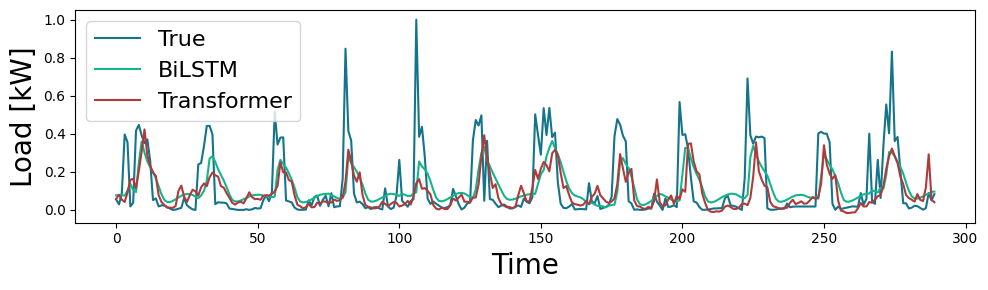

In [8]:
#dense_model = keras.models.load_model(cwd + f"/models/Local_learning/Dense/L3_U16/User10", compile=False)
#dense_model.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.0006), metrics=metrics)

cnn_model = keras.models.load_model(cwd + f"/models/Local_learning/CNN/User10", compile=False)
cnn_model.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.0006), metrics=metrics)

bilstm_model = keras.models.load_model(cwd + f"/models/Local_learning/LSTM/L2_U20/User10", compile=False)
bilstm_model.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.0006), metrics=metrics)

transformer_model = keras.models.load_model(cwd + f"/models/Local_learning/Transformer/Transformer_ED2_h4_d32/User10", compile=False)
transformer_model.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.0006), metrics=metrics)

#y_pred_dense = dense_model.predict(X_test['user10'], batch_size=batch_size)
y_pred_bilstm = bilstm_model.predict(X_test['user10'], batch_size=batch_size)
y_pred_transformer = transformer_model.predict(X_test['user10'], batch_size=batch_size)


# Plot prediction results
fig = plt.figure(figsize=(10, 3))
plt.plot(y_test['user10'][5:295], label='True', color='#13748B')
#plt.plot(y_pred_dense[5:295], label='Dense', color='#A0A7BC')
plt.plot(y_pred_bilstm[5:295], label='BiLSTM',color='#13B58B')
plt.plot(y_pred_transformer[5:295], label='Transformer', color='#B03A3A')
plt.xlabel('Time', fontsize=20)
plt.ylabel('Load [kW]', fontsize=20)
plt.legend(fontsize=16)
plt.tight_layout()


In [108]:
fig.savefig('images/SVM_format/Figure_results_local_learning_benchmarking.svg', bbox_inches='tight')
plt.close(fig) 